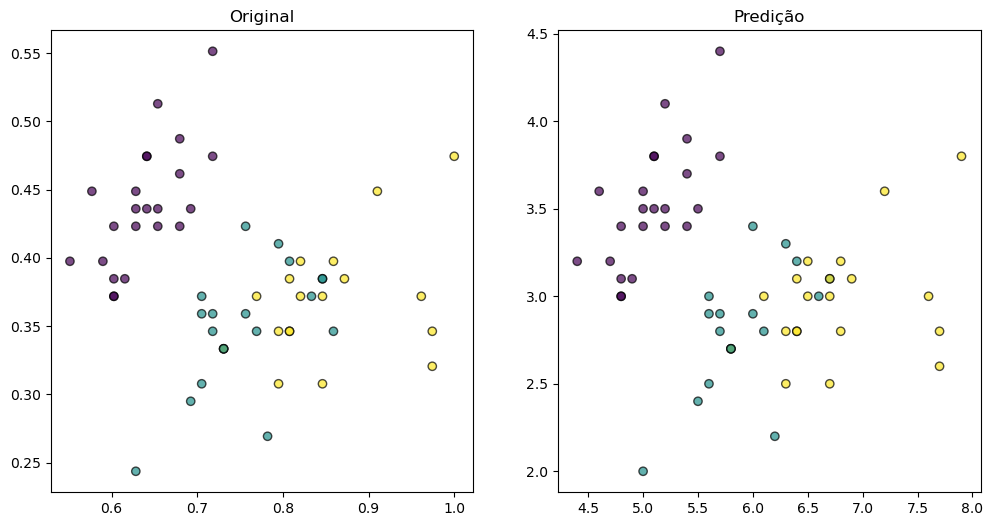

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 2 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from artlib import GaussianART, SimpleARTMAP
import numpy as np
import matplotlib.pyplot as plt


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Initialize the Gaussian ART model
sigma_init = np.array([0.5] * X_train.shape[1])  # variance estimate for each feature
module_a = GaussianART(rho=0.0, sigma_init=sigma_init)

lower_bounds = np.array([np.min(X)] * 4)
upper_bounds = np.array([np.max(X)] * 4)
module_a.set_data_bounds(lower_bounds, upper_bounds)


# Initialize the SimpleARTMAP model
model = SimpleARTMAP(module_a=module_a)

train_X_prep = model.prepare_data(X_train)
test_X_prep = model.prepare_data(X_test)


# Fit the model
model.fit(train_X_prep, y_train)

# Predict data labels
predictions = model.predict(test_X_prep)

f, subplots = plt.subplots(1, 2, figsize=(12, 6))

subplots[0].scatter(
    test_X_prep[:, 0],
    test_X_prep[:, 1],  # coordenadas x e y
    c=y_test,  # cor de acordo com a classe (0 ou 1)
    edgecolors="k",  # contorno preto em cada ponto
    alpha=0.7,
)
subplots[0].set_title("Original")
subplots[1].scatter(
    X_test[:, 0],
    X_test[:, 1],  # coordenadas x e y
    c=predictions,  # cor de acordo com a classe (0 ou 1)
    edgecolors="k",  # contorno preto em cada ponto
    alpha=0.7,
)
subplots[1].set_title("Predição")
plt.show()
print(y_test)
print(predictions)